# Investigate Titanic Dataset

### What factors made passengers more likely to survive?

In [85]:
# import necessary libraries
import numpy as np
import pandas as pd

In [86]:
# load the titanic dataset
titanic_raw = pd.read_csv("titanic_data.csv")

We loaded the data in titanic_raw dataframe. Let's see the structure of the data

In [240]:
# we can see only top five rows
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rel,Gender,Embarked_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0


We have 12 columns. Observe that the Cabin column has a weird value 'NaN', which means Not a Number (Not available).
Some other columns might also have this kind of missing values. Let's check them

In [88]:
len(titanic_raw)

891

In [89]:
titanic_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column has most number of missing values. Since cabin is not contributing anything for end result, we can remove that. Age column has 177/891 missing values. We need to replace those missing values with appropriate value. Embarked has only 2 missing values.

## Data Wrangling

In this step we will find and correct irregularities of data. Those are missing values and other data errors. I am imputing missing values with __mean__ of that column. There are so many ways one can impute values. Other popular way is to impute with __median__.

### Age

In [90]:
# fill all missing values of 'age' with mean value of 'age'.
titanic_raw['Age'] = titanic_raw['Age'].fillna(titanic_raw['Age'].mean())

In [91]:
titanic_raw['Age'].isnull().sum()

0

Now we don't have any missing values in __Age__

### Embarked

Let's explore __Embarked__ before imputing missing values.

In [92]:
titanic_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since __S__ has maximum number of values, we will replace missing values with __S__

In [93]:
titanic_raw['Embarked'] = titanic_raw['Embarked'].fillna('S')

In [94]:
titanic_raw['Embarked'].isnull().sum()

0

For convenience we will create a new column called __Embarked_new__ and replace __S__ with __0__, __C__ with __1__ and __Q__ with __1__

In [102]:
titanic_raw['Embarked_new'] = titanic_raw['Embarked'].map({'S':0, 'C':1, 'Q':2})
titanic_raw['Embarked_new'].value_counts()

0    646
1    168
2     77
Name: Embarked_new, dtype: int64

There are no missing values in __Embarked__ column

We have two columns that represents number of relatives of passengers, __SibSp__ and __Parch__. We may want to find out whether there is any relation between number of relatives and survivalship rate. We will create a new column __rel__ to represent the number of relatives in which we will combine both __SibSp__ and __Parch__.

In [103]:
titanic_raw['rel'] = titanic_raw['SibSp'] + titanic_raw['Parch']

Let's explore each column independently before finding the relationships between them.

### Survived

In [104]:
titanic_raw['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So there are total __342__ people survived and __549__ people passed away.

### Pclass

In [105]:
titanic_raw['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

So there are more people in __3 class__ than rest of the classes combined. Will this give any clue in our exploration? We will find out soon.

### Sex

In [106]:
titanic_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are more __male__s than __female__s approximately two times.

For convenience we will create a new column called __Gender__ and replace all __male__ values with __0__ and __female__ values with __1__ (Yes, I am a feminist :) )

### Gender

In [107]:
titanic_raw['Gender'] = titanic_raw['Sex'].map({'female':1, 'male':0}).astype(int)
titanic_raw['Gender'].value_counts()

0    577
1    314
Name: Gender, dtype: int64

### Age

Because __Age__ is continuous variable, we will plot it and explore.

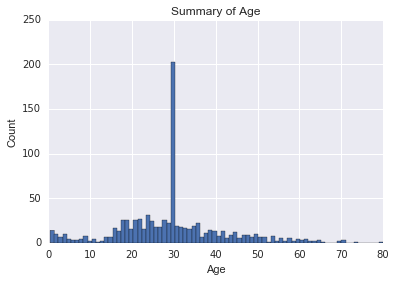

In [238]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
plt.hist(titanic_raw['Age'], bins = 80)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Summary of Age')
plt.show()

Observe that __age 30__ has unusual count. This is because previously I replaced missing values with __mean__.

### rel

In [109]:
titanic_raw['rel'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: rel, dtype: int64

Most of the people don't have any relatives. Some have __1__ or __2__ relatives and very few have more number of relatives.

### Fare

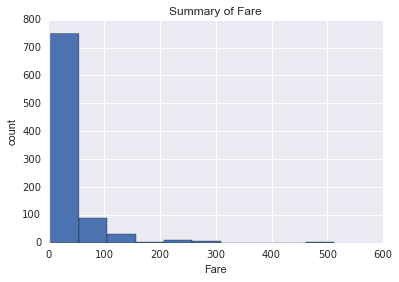

In [239]:
plt.figure()
plt.hist(titanic_raw['Fare'])
plt.xlabel('Fare')
plt.ylabel('count')
plt.title('Summary of Fare')
plt.show()

In [111]:
titanic_raw[titanic_raw['Fare'] == 0]['Fare'].count()

15

So there are 15 values that have __Fare__ as __0__. There is something wrong here. There should no __0 Fare__. So we will replace these __0__ values with __mean__ of __Fare__

In [112]:
titanic_raw.loc[titanic_raw['Fare']==0, 'Fare'] = titanic_raw['Fare'].mean()

Now we will see how many __0 Fare__ values are there.

In [113]:
titanic_raw[titanic_raw['Fare'] == 0]['Fare'].count()

0

Now we successfully replaced with __mean__ values.

## Data Exploration

Now we will find out the relation between other columns and __Survived__ column. This is the relationship that we want to find out.

In [114]:
titanic_raw.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,rel,Gender,Embarked_new
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.015703,-0.040143,-0.042939,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.251092,0.016639,0.543351,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.556409,0.065997,-0.131900,0.045702
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.094039,-0.248512,-0.084153,0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.155030,0.890712,0.114631,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.211818,0.783111,0.245489,-0.078665
Fare,0.015703,0.251092,-0.556409,0.094039,0.155030,0.211818,1.000000,0.211778,0.174911,0.056134
rel,-0.040143,0.016639,0.065997,-0.248512,0.890712,0.783111,0.211778,1.000000,0.200988,-0.080281
Gender,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.174911,0.200988,1.000000,0.116569
Embarked_new,-0.030467,0.106811,0.045702,0.007461,-0.059961,-0.078665,0.056134,-0.080281,0.116569,1.000000


The columns that have strong correlation (either positive or negative) with __Survived__ are __Pclass__, __Fare__ and __Gender__.

Let's explore each of them now.

### Survival rate by Pclass

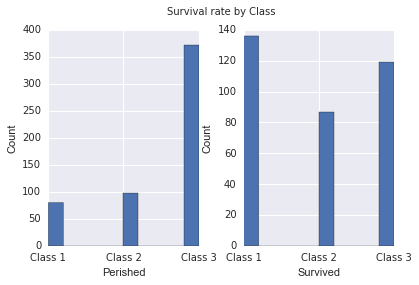

In [190]:
#table = pd.pivot_table(titanic_raw, values = 'Survived', index = 'Pclass', columns = 'Survived', aggfunc=np.mean)

axes = titanic_raw['Pclass'].hist(by = titanic_raw['Survived'])

axes[0].set_xticks(np.arange(1.0,4.0,1.0))
axes[0].set_xticklabels(['Class 1', 'Class 2', 'Class 3'], rotation='horizontal')
axes[0].set_xlabel('Perished')
axes[0].set_title(' ')
axes[0].set_ylabel('Count')
axes[1].set_xticks(np.arange(1.0,4.0,1.0))
axes[1].set_xticklabels(['Class 1', 'Class 2', 'Class 3'], rotation='horizontal')
axes[1].set_xlabel('Survived')
axes[1].set_title(' ')
axes[1].set_ylabel('Count')

plt.suptitle('Survival rate by Class')
plt.show()

Most people survived in __Pclass 1__. But most important observation that we need to make is, in __Pclass 3__ more people died, two times more than other classes combined.

Now we will look into the relationship between __Fare__ and __Survived__ columns.

### Survival rate by Fare

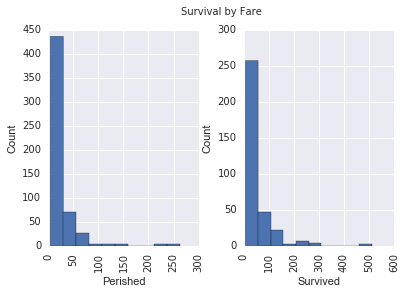

In [171]:
axes = titanic_raw['Fare'].hist(by = titanic_raw['Survived'])

axes[0].set_xlabel('Perished')
axes[0].set_title(' ')
axes[0].set_ylabel('Count')
axes[1].set_xlabel('Survived')
axes[1].set_title(' ')
axes[1].set_ylabel('Count')

plt.suptitle('Survival by Fare')
plt.show()

We can see that most people who perished are with low __Fare__

### Survival rate by Gender

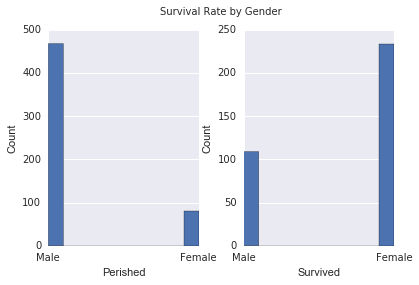

In [186]:
axes = titanic_raw['Gender'].hist(by = titanic_raw['Survived'])

axes[0].set_xticks(np.arange(0.0,2.0,1.0))
axes[0].set_xticklabels(['Male', 'Female'], rotation='horizontal')
axes[0].set_xlabel('Perished')
axes[0].set_title(' ')
axes[0].set_ylabel('Count')
axes[1].set_xticks(np.arange(0.0,2.0,1.0))
axes[1].set_xticklabels(['Male', 'Female'], rotation='horizontal')
axes[1].set_xlabel('Survived')
axes[1].set_title(' ')
axes[1].set_ylabel('Count')

plt.suptitle('Survival Rate by Gender')
plt.show()

We can clearly observed that __more__ number of __Males__ perished, but __very less__ number of __Females__ perished. The survival rate of __Female__ is very high compared to __Male__. What might be the reason? One reason that I can think of is, in evacuation process the first preference was given to women and children. So more women survived than men.

### Survival rate by Embarked

Even though __Embarked__ is not that significant when compared to other columns, we will just look at relationship between __Embarked__ and __Survived__ just for fun.

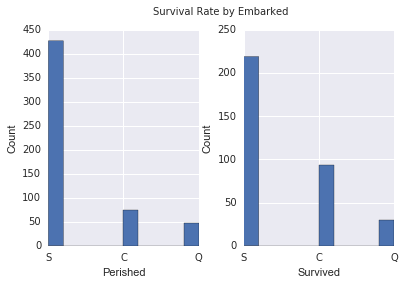

In [184]:
axes = titanic_raw['Embarked_new'].hist(by = titanic_raw['Survived'])

axes[0].set_xticks(np.arange(0.0,3.0,1.0))
axes[0].set_xticklabels(['S', 'C', 'Q'], rotation='horizontal')
axes[0].set_xlabel('Perished')
axes[0].set_title(' ')
axes[0].set_ylabel('Count')
axes[1].set_xticks(np.arange(0.0,3.0,1.0))
axes[1].set_xticklabels(['S', 'C', 'Q'], rotation='horizontal')
axes[1].set_xlabel('Survived')
axes[1].set_title(' ')
axes[1].set_ylabel('Count')

plt.suptitle('Survival Rate by Embarked')
plt.show()

There is not that much significant difference between three Embarked locations. We can see high bars for __S__ because more number of people Embarked from __S__

Now we find three most significant factors that affect Survival rate of passengers. Those are __Pclass__, __Fare__, __Gender__. __Pclass__ and __Fare__ are related to each other. Because rich people can buy first class with higher fare.

### Survival rate by Pclass and Gender

Now we will see how both __Pclass__ and __Gender__ both combined affect Survival rate of passengers.

In [215]:
titanic_raw.groupby(['Pclass','Gender','Survived']).count()['Name']

Pclass  Gender  Survived
1       0       0            77
                1            45
        1       0             3
                1            91
2       0       0            91
                1            17
        1       0             6
                1            70
3       0       0           300
                1            47
        1       0            72
                1            72
Name: Name, dtype: int64

This will give us great insights about the data. Here __0 = Male__ and __1 = Female__.(Don't confuse here). __Class 1 Female__'s have high survival count than any other category. But __class 3 Male__'s have high perished count.

Now we will see the above information visually.

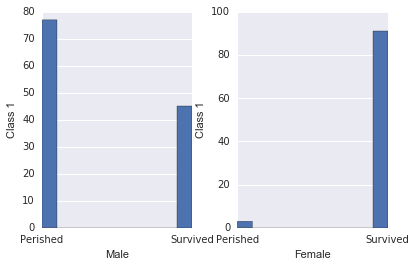

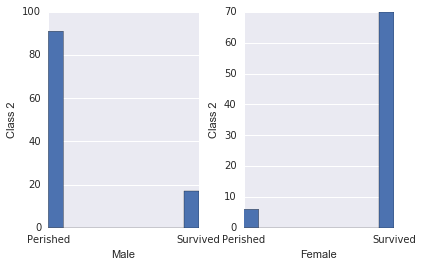

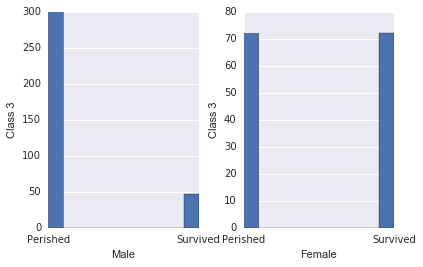

In [229]:
axes = titanic_raw.groupby('Pclass')['Survived'].hist(by=titanic_raw['Gender'])

axes[1][0].set_xticks(np.arange(0.0,2.0,1.0))
axes[1][0].set_xticklabels(['Perished', 'Survived'], rotation='horizontal')
axes[1][0].set_xlabel('Male')
axes[1][0].set_title(' ')
axes[1][0].set_ylabel('Class 1')
axes[1][1].set_xticks(np.arange(0.0,2.0,1.0))
axes[1][1].set_xticklabels(['Perished', 'Survived'], rotation='horizontal')
axes[1][1].set_xlabel('Female')
axes[1][1].set_title(' ')
axes[1][1].set_ylabel('Class 1')
axes[2][0].set_xticks(np.arange(0.0,2.0,1.0))
axes[2][0].set_xticklabels(['Perished', 'Survived'], rotation='horizontal')
axes[2][0].set_xlabel('Male')
axes[2][0].set_title(' ')
axes[2][0].set_ylabel('Class 2')
axes[2][1].set_xticks(np.arange(0.0,2.0,1.0))
axes[2][1].set_xticklabels(['Perished', 'Survived'], rotation='horizontal')
axes[2][1].set_xlabel('Female')
axes[2][1].set_title(' ')
axes[2][1].set_ylabel('Class 2')
axes[3][0].set_xticks(np.arange(0.0,2.0,1.0))
axes[3][0].set_xticklabels(['Perished', 'Survived'], rotation='horizontal')
axes[3][0].set_xlabel('Male')
axes[3][0].set_title(' ')
axes[3][0].set_ylabel('Class 3')
axes[3][1].set_xticks(np.arange(0.0,2.0,1.0))
axes[3][1].set_xticklabels(['Perished', 'Survived'], rotation='horizontal')
axes[3][1].set_xlabel('Female')
axes[3][1].set_title(' ')
axes[3][1].set_ylabel('Class 3')

plt.show()

This histogram clearly represents the above arguments.

## Conclusion

After analyzing the data, here is what we can conclude about it.

1. Higher class people have more chances of surviving when compared to other classes.
2. Female have high chances of surviving compared to Gender.
3. People who paid high Fare are more likely to survive. This is also related to Pclass (Rich people can travel with first class by paying high fare)
4. First class women has high survival rate than any other category.
5. Age, Embarked, rel give some insights but we can't be sure to say exactly. 

## References

1. [A Complete Tutorial to Learn Data Science with Python from Scratch](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/)
2. [Udacity Discussions](https://discussions.udacity.com/c/nd002-p2-intro-to-data-analysis/p2-investigate-a-dataset)
3. [MarkDown Syntax](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
4. [Google + Stackoverflow](http://stackoverflow.com/questions/tagged/pandas)